# Wstęp do sztucznych sieci neuronowych
### Czym są sieci neuronowe?
Najprościej -- uniwersalnym aproksymatorem funkcji. Mówi o tym twierdzenie Kołogomorowa, ale jako że to są ćwiczenia, nie będziemy go omawiać. To, co jest ważne, to że będziemy uczyć sieć neuronową aproksymować pewną (wybraną przez nas) funkcję.

W tym miejscu pragnę zaznaczyć, że dzisiejsze zajęcia zawierają dydaktyczne oszustwa. Na potrzebę tychże zajęć zajmujemy się wyłącznie sieciami jednokierunkowymi w pełni połączonymi, dlatego nie będę zaznaczał za każdym razem "z pewnymi wyjątkami". Istnieje duże prawdopodobieństwo, że dla każdego ze zdań na zajęciach istnieje kontrprzykład w postaci pracy opublikowanej gdzieś na drugim końcu świata w przeciągu ostatnich 5 lat i mającej zawrotne dwa cytowania. Z tej przyczyny pozwalam sobie na uproszczenia mające na celu pokazanie ogólnego zarysu metody.

### A w praktyce?
W praktyce sieci neuronowe prezentowane są jako złożenie kombinacji liniowych i nieliniowych przekształceń. Brzmi skomplikowanie, dlatego zacznijmy bardzo prostego przykładu, sieci z jednym neuronem:


![](https://www.researchgate.net/publication/286020106/figure/fig13/AS:328309167673363@1455286414002/Basic-artificial-neural-network-cell-artificial-neuron.png)
Źródło: Hüseyin Ceylan, An Artificial Neural Networks Approach to Estimate
Occupational Accident: A National Perspective for Turkey, 2014

W prakyce sieci neuronowe wizualizowane są przez tego typu obrazki:
![](https://visualstudiomagazine.com/articles/2014/11/01/~/media/ECG/visualstudiomagazine/Images/2014/11/1114vsm_mccaffreyfig2.ashx)
Źródło: https://visualstudiomagazine.com/articles/2014/11/01/use-python-with-your-neural-networks.aspx

Spójrzmy teraz na sieć w nieco inny sposób niż na powyższych obrazkach. Pomyślmy, jak opisać ją wzorem. Z pominięciem składowej stałej możemy powyższą sieć opisać wzorem:

$$ y = W_2 \cdot f(W_1 \cdot x) $$

Gdzie:  
$ y $  -- wektor wyjść  
$ x $  -- wektor wejść  
$ f() $ -- nieliniowa funkcja $ \mathbb{R}^n \to \mathbb{R}^n $  
$ W_1 $, $ W_2 $ -- macierze wag odpowiednich warstw

Dlaczego ważny jest zapis macierzowy? Komputer bardzo dobrze zrównolegla obliczenia macierzowe. W szczególności karty graficzne specjalizują się w obliczeniach macierzowych. Dlatego trening sieci na karcie graficznej jest zazwyczaj kilkadziesiąt razy szybszy niż na procesorze.

### Jak wytrenować sieć neuronową?
Do tej pory mówiliśmy o tym, jak sieci neuronowe wyznaczają wyjście dla zadanego wejścia. Ale jak je nauczyć? Odpowiedzią jest algorytm wstecznej propagacji gradientu. Na wysokim poziomie działa to tak:
* Dajemy sieci wejście i mówimy: zgadnij, jaka jest odpowiedź
![](https://hmkcode.com/images/ai/bp_forward.png)
* Sieć zwraca nam wyjście, a my liczymy ile się pomyliła
![](https://hmkcode.com/images/ai/bp_error.png)
* Wyznaczamy różniczki błędu po poszczególnych wagach. Liczymy to w dość sprytny sposób, ale nie będziemy się w to teraz wgłębiać
* Znając tę różniczki, możemy powiedzieć jak mocno poszczególne wagi wpłynęły na uzyskany błąd. Dlatego aktualizujemy wagi według wzoru:
$$ W_{k, i, j} = W_{k, i, j} - a \cdot {{\partial E}\over{\partial W_{k, i, j}}}$$
Gdzie:  
$W_{k, i, j}$ -- waga połączenia z $i$-tego neuronu $k-1$ warstwy do $j$-tego neuronu $k$-tej warstwy  
$E$ -- obliczona "różnica" między wartością zwróconą a tą, której się spodziewaliśmy  
$a$ -- stała uczenia

W rzeczywistości takie uczenie byłoby bardzo niestabilne, ponieważ każdy punkt ze zbioru uczącego "ciągnąłby" parametry w swoją stronę. Dlatego uczymy w tak zwanych batchach składających się z kilkunastu -- kilkuset punktów jednocześnie. Pochodne obliczone dla każdego z punktów z batcha dodajemy do siebie i otrzymujemy "średni kierunek poprawiający". W tej sposób sieć uczy się znacznie bardziej stabilnie.

### A jak to zaprogramować?
* Można napisać wszystko ręcznie -- zapewne czeka Was jeszcze taki projekt.
* Można skorzystać z dedykowanych bibliotek, na przykład `pytorch`, `tensorflow` czy `keras` 
* Można skorzystać z `sklearn.neural_network`

### Przykład 1. -- klasyfikacja
W związku z tym, że sieć neuronowa może mieć wiele wyjść, bardzo naturalne jest jej wykorzystanie do zadania klasyfikacji wieloklasowej. Pomysł jest taki, żeby $i$-te wyjście mówiło o prawdopodobieństwie przynależności do $i$-tej klasy. Aby to osiągnąć, normalizuje się wyjścia funkcją sofmax:
$$ {{e^{y_i}}\over {\sum_{j=1}^K e^{y_j}}} $$

Gdzie:  
$y_i$ -- $i$-te wyjście  
$K$ -- liczba klas

Zbiór mnist zawiera ręcznie pisane cyfry.
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
Żródło: https://en.wikipedia.org/wiki/MNIST_database

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np
import pandas as pd
from itertools import product

In [127]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.
y = [int(i) for i in y] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=1)

In [156]:
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, solver='sgd', verbose=10, random_state=123,
                    learning_rate_init=.1, alpha=0.00001)

In [157]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.28346370
Iteration 2, loss = 0.11896459
Iteration 3, loss = 0.08335229
Iteration 4, loss = 0.06606909
Iteration 5, loss = 0.05358032
Iteration 6, loss = 0.04287490
Iteration 7, loss = 0.03655472
Iteration 8, loss = 0.02910649
Iteration 9, loss = 0.02420177
Iteration 10, loss = 0.02061443
Iteration 11, loss = 0.01525255
Iteration 12, loss = 0.01271290
Iteration 13, loss = 0.01061340
Iteration 14, loss = 0.00876194
Iteration 15, loss = 0.00689842
Iteration 16, loss = 0.00573134
Iteration 17, loss = 0.00506259
Iteration 18, loss = 0.00432358
Iteration 19, loss = 0.00357081
Iteration 20, loss = 0.00313156
Iteration 21, loss = 0.00288547
Iteration 22, loss = 0.00252083
Iteration 23, loss = 0.00227338
Iteration 24, loss = 0.00209070
Iteration 25, loss = 0.00194695
Iteration 26, loss = 0.00179541
Iteration 27, loss = 0.00167372
Iteration 28, loss = 0.00159260
Iteration 29, loss = 0.00148421
Iteration 30, loss = 0.00139501
Iteration 31, loss = 0.00132754
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=123, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [158]:
print(f"Training set score: {mlp.score(X_train, y_train):.3}")
print(f"Test set score: {mlp.score(X_test, y_test):.3}")

Training set score: 1.0
Test set score: 0.98


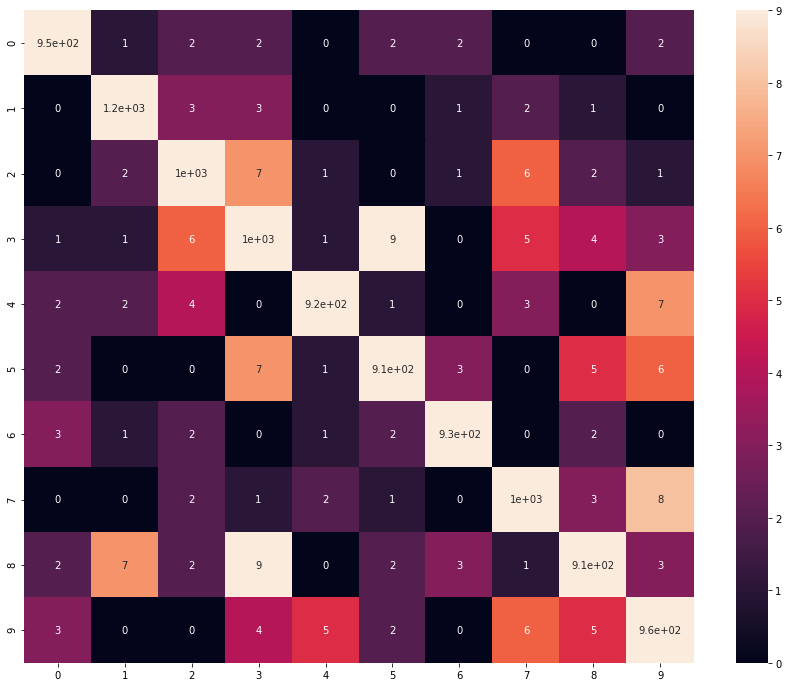

In [159]:
y_pred = mlp.predict(X_test)
conf_m = confusion_matrix(y_test, y_pred)

mask = np.ones(conf_m.shape, dtype=bool)
np.fill_diagonal(mask, 0)
max_value = conf_m[mask].max()

plt.figure(figsize = (15,12))
sn.heatmap(conf_m, annot=True, vmax=max_value)
# conf_m

In [160]:
labels_df = pd.DataFrame(zip(y_pred, y_test), columns=['pred', 'real'], dtype=int)

In [161]:
pred_9_df = labels_df[labels_df['pred'] == 9]
wrong_9_preds = pred_9_df[pred_9_df['real'] != 9]
wrong_9_preds.shape

(30, 2)

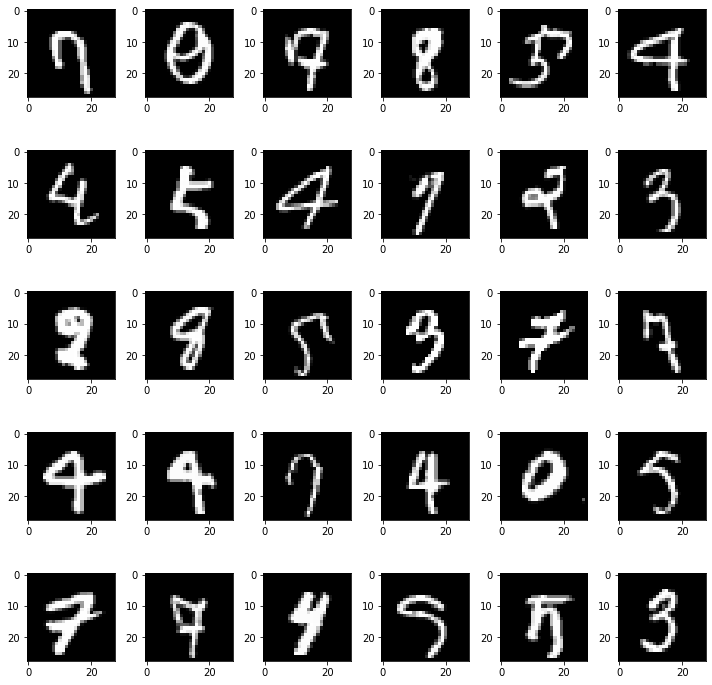

In [166]:
nrows = 5
ncols = 6
figure, axes = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_figheight(10)
figure.set_figwidth(10)
figspace = product(range(nrows), range(ncols))

for (idx, _), (row, col) in zip(wrong_9_preds.iterrows(), figspace):
    img = X_test[idx]
    img = img.reshape((28, 28))
    axes[row, col].imshow(img)
figure.tight_layout()

### Przykład 2. -- redukcja wymiarów
Sieci neuronowe można stosować też w innych zadaniach. Na przykład w zadaniu redukcji wymiarów. Używa się do tego tak zwanych autoenkoderów.
![](https://blog.paperspace.com/content/images/size/w2000/2020/01/1_oUbsOnYKX5DEpMOK3pH_lg.png)
Źródło: https://blog.paperspace.com/autoencoder-image-compression-keras/

In [114]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 64

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [120]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [121]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [122]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2538 - val_loss: 0.2391
Epoch 2/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2285 - val_loss: 0.2163
Epoch 3/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2095 - val_loss: 0.2005
Epoch 4/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1960 - val_loss: 0.1891
Epoch 5/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1858 - val_loss: 0.1801
Epoch 6/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1775 - val_loss: 0.1723
Epoch 7/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1704 - val_loss: 0.1658
Epoch 8/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1642 - val_loss: 0.1600
Epoch 9/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1587 - val_loss: 0.1

60000/60000 [==============================] - 1s 20us/step - loss: 0.0842 - val_loss: 0.0830
Epoch 78/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0841 - val_loss: 0.0828
Epoch 79/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0839 - val_loss: 0.0827
Epoch 80/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0838 - val_loss: 0.0825
Epoch 81/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0836 - val_loss: 0.0824
Epoch 82/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0834 - val_loss: 0.0823
Epoch 83/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0833 - val_loss: 0.0821
Epoch 84/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0832 - val_loss: 0.0820
Epoch 85/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0830 - val_loss: 0.0818
Epoch 86/100
60000/60000 [========================

In [123]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

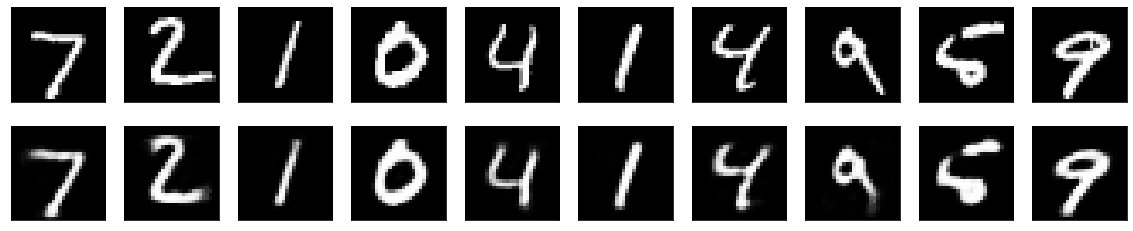

In [124]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Kiedy używać sieci neuronowych:

1. Kiedy mamy duży zbiór danych
2. W zadaniach podobnych do tych, w których ktoś już z powodzeniem użył sieci neuronowych
3. Jeśli istnieją architektury dostosowane do naszego problemu
4. Kiedy nie zależy nam na interpretowalności
5. Gdy mamy dostępną dużą moc obliczeniową do treningu
6. Kiedy mamy dużo czasu na przygotowanie modelu
7. Gdy rozwiązanie na produkcji nie musi działać bardzo szybko lub jesteśmy w stanie zapewnić dużą moc obliczeniowa również na produkcję
8. Gdy zależy nam na (pewnej) odporności na szum na wejściu
9. Jeśli chcemy "wyciągnąć" reprezentację z warstwy ukrytej
10. Jeśli zależy nam na pewnej elastyczności wynikającej z modularnej budowy